# IID Results

In [1]:
SCENARIO = "non_iid_B"

## Plot client, global, and centralised model validation accuracies

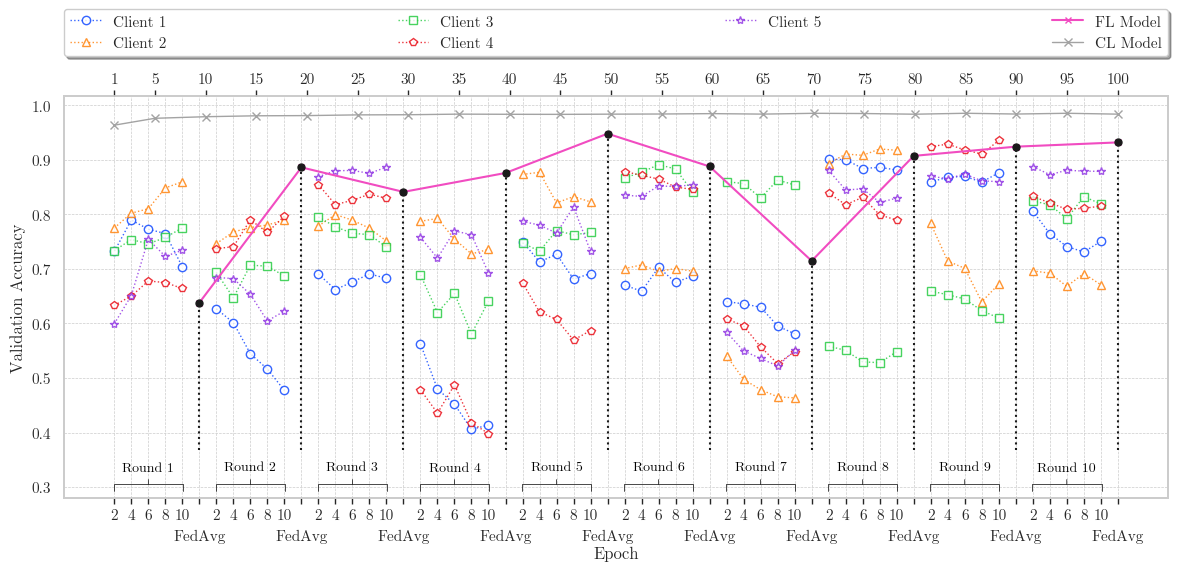

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from matplotlib.lines import Line2D

# Setting style and palette
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.size'] = '14'
color_palette = sns.color_palette("bright")

# Read the JSON file
with open('results/cl_results.json', 'r') as f:
    cl_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c1_results.json', 'r') as f:
    c1_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c2_results.json', 'r') as f:
    c2_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c3_results.json', 'r') as f:
    c3_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c4_results.json', 'r') as f:
    c4_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c5_results.json', 'r') as f:
    c5_data = json.load(f)

with open(f'results/{SCENARIO}_fl_server_results.json', 'r') as f:
    s_data = json.load(f)

# Centralised model data
cl_accuracies = cl_data['val_metrics']['accuracy']

# Client Data
client_accuracies = {
    "1": c1_data['val_metrics']['accuracy'],
    "2": c2_data['val_metrics']['accuracy'],
    "3": c3_data['val_metrics']['accuracy'],
    "4": c4_data['val_metrics']['accuracy'],
    "5": c5_data['val_metrics']['accuracy']
}

# Server Data
aggregated_accuracies = s_data['val_metrics']['accuracy']

fig, ax = plt.subplots(figsize=(12, 6))

# Second x-axis for cl_accuracies
ax2 = ax.twiny()

# Define n (every nth value will be plotted)
n = 2

# Define custom x-ticks and labels without 'Agg'
if n == 2:
    custom_labels = ['2', '4', '6', '8', '10']
elif n == 5:
    custom_labels = ['1', '5', '10']
else:
    custom_labels = [str(i) for i in range(1, 11)][::n]

num_batches = len(aggregated_accuracies)

# Inserting gaps between every batch of client accuracies for visual separation
def insert_gaps(data, batch_size, n):
    new_data = []
    for i in range(num_batches):
        if n == 2:
            batch_data = [data[i * batch_size + j - 1] for j in range(2, batch_size + 1, n)]
        elif n == 5:
            batch_data = [data[i * batch_size], data[i * batch_size + 4], data[i * batch_size + 9]]
        else:
            batch_data = data[i * batch_size : (i + 1) * batch_size][::n]
        new_data.extend(batch_data)
        new_data.append(None)  # gap after each batch
    return new_data

# Use similar markers as in the second code
markers = ['o', '^', 's', 'p', '*']

# Client accuracies plotting
for i, (client_id, accuracies) in enumerate(client_accuracies.items()):
    ax.plot(insert_gaps(accuracies, 10, n),
            label=f"Client {client_id}",
            color=color_palette[i],
            marker=markers[i],
            linestyle=':',
            markerfacecolor='white',
            alpha=0.8,
            linewidth=1)

all_labels = custom_labels + ['']
agg_x_positions = [len(all_labels) * i + len(custom_labels) for i in range(num_batches)]

# Aggregated accuracies plotting
ax.plot(agg_x_positions,
        aggregated_accuracies,
        'x',
        label="FL Model",
        color=color_palette[len(client_accuracies) + 1],
        linestyle='-',
        markersize=5)

ax.plot(agg_x_positions, aggregated_accuracies
        , 'ko'
        , label="Aggregation"
        , markersize=5
        # , color=color_palette[len(client_accuracies) + 1]
        )

ax.set_xticks([i for i in range(num_batches * len(all_labels))])
ax.set_xticklabels(all_labels * num_batches)

all_labels = custom_labels + ['']
ax.set_xticks([i for i in range(num_batches * len(all_labels))])
ax.set_xticklabels(all_labels * num_batches)

# Desired x-positions and corresponding accuracy values
# desired_epochs = np.arange(1, 101, 5)  # 1, 5, 10, ..., 95, 100
desired_epochs = np.concatenate(([1], np.arange(5, 101, 5)))
cl_x_positions = desired_epochs - 1    # Adjusting to index at 0
cl_selected_accuracies = [cl_accuracies[i] for i in cl_x_positions]

# Plotting cl_accuracies on the second x-axis (ax2)
ax2.plot(desired_epochs,
         cl_selected_accuracies,
         label="CL Model",
         color=color_palette[len(client_accuracies) + 2],  # Choose different color index
         marker='x',
         linestyle='-',
         alpha=1,
         linewidth=1)


# Grid, labels, title, and legend
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xlabel("Epoch", labelpad=17)
ax.set_ylabel("Validation Accuracy")
ax.tick_params(axis='x', which='major', width=1, length=4)  # Set tick length for bottom x-axis

# Legend
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

all_hndls = handles + handles2
all_lbls = labels + labels2

all_hndls[5], all_hndls[6] = all_hndls[6], all_hndls[5]
all_lbls[5], all_lbls[6] = all_lbls[6], all_lbls[5]

# Add an empty label
all_hndls[5] = Line2D([0], [0], marker=None, linestyle=None, color='none')
all_lbls[5] = ""

# Legend (with bbox_to_anchor and other attributes similar to the second code)
ax.legend(handles=all_hndls, labels=all_lbls,
          bbox_to_anchor=(0., 1.1, 1., .102),
          loc='lower left',
          ncol=4,
          mode="expand",
          borderaxespad=0.,
          fancybox=True,
          shadow=True)

# Adding label and ticks for the second x-axis (ax2)
# ax2.set_xlabel("CL Epoch", labelpad=15)
ax2.set_xticks(desired_epochs)
ax2.set_xticklabels(desired_epochs)
ax2.grid(False)
ax2.tick_params(axis='x', which='major', width=1, length=4)  # Set tick length for bottom x-axis

# Adding "Agg" manually shifted downwards
for i in range(1, num_batches + 1):
    ax.text(i * len(all_labels) - 1, -0.095, 'FedAvg', ha='center', va='center', transform=ax.get_xaxis_transform(), fontsize=11)

# Retrieve the current y-axis limits
ymin, ymax = ax.get_ylim()

# Adding vertical dotted lines
for pos, acc in zip(agg_x_positions, aggregated_accuracies):
    ax.vlines(x=pos, ymin=ymin, ymax=acc, color='k', linestyles='dotted')


#### ROUNDS BELOW THE X AXIS
# round_labels = ["Round 1", "Round 2", "Round 3", "Round 4", "Round 5", "Round 6", "Round 7", "Round 8", "Round 9", "Round 10"]
# num_rounds = len(round_labels)
#
# # Computing the position for each label
# x_positions = [2, 8, 14, 20, 26, 32, 38, 44, 50, 56]
#
# # Adding each label below the x-axis
# for i, label in enumerate(round_labels):
#     ax.text(x_positions[i], -0.15, label, ha='center', va='center', transform=ax.get_xaxis_transform(), fontsize=11)

ax.set_ylim(0.28, ax.get_ylim()[1])

def draw_custom_annotation(ax, mid_point, y, text, text_offset=0.025, color='black',
                           widthB=8.0, lengthB=0.5, fontsize=12, lw=0.5):
    ax.annotate(text,
                xy=(mid_point, y),
                xytext=(mid_point, y + text_offset),
                fontsize=fontsize, ha='center', va='bottom', color=color,
                arrowprops=dict(arrowstyle=f'-[, widthB={widthB}, lengthB={lengthB}',
                                lw=lw, color=color),
                )

# Adding an annotation
y=0.3
draw_custom_annotation(ax, mid_point=2, y=y, text='Round 1', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=8, y=y, text='Round 2', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=14, y=y, text='Round 3', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=20, y=y, text='Round 4', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=26, y=y, text='Round 5', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=32, y=y, text='Round 6', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=38, y=y, text='Round 7', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=44, y=y, text='Round 8', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=50, y=y, text='Round 9', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=56, y=y, text='Round 10', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)

# Save the plot
plt.tight_layout()
plt.savefig(f"results/fig/fl_{SCENARIO}_val_acc_all.png", dpi=300)
plt.show()

# Clear the current plot
plt.clf()

## Plot client, global, and centralised model validation losses

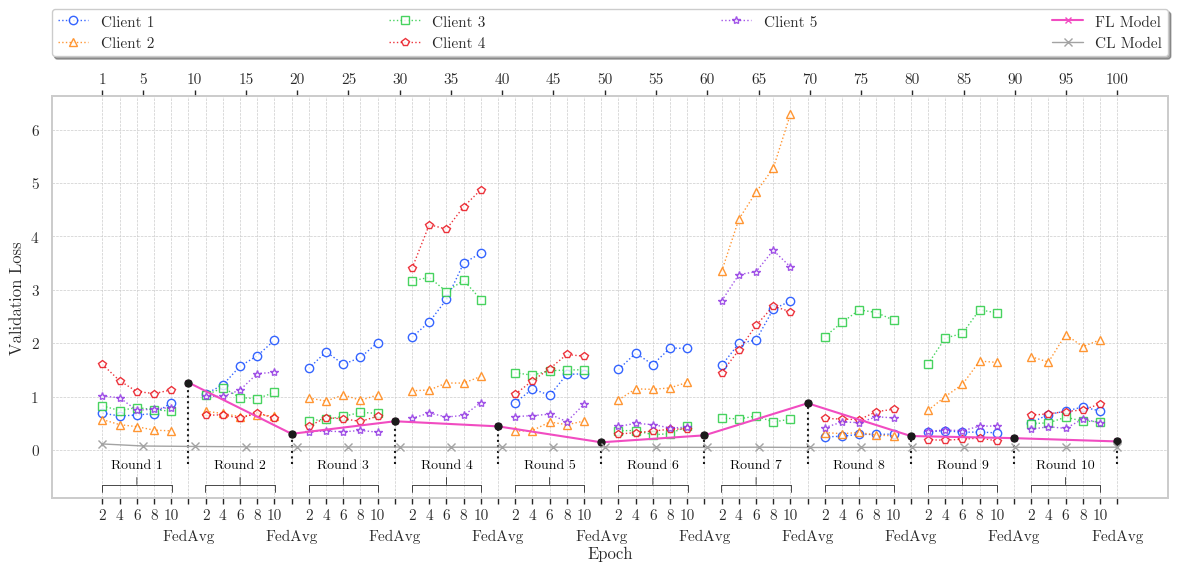

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from matplotlib.lines import Line2D

# Setting style and palette
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.size'] = '14'
color_palette = sns.color_palette("bright")

# Read the JSON file
with open('results/cl_results.json', 'r') as f:
    cl_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c1_results.json', 'r') as f:
    c1_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c2_results.json', 'r') as f:
    c2_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c3_results.json', 'r') as f:
    c3_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c4_results.json', 'r') as f:
    c4_data = json.load(f)

with open(f'results/{SCENARIO}_fl_c5_results.json', 'r') as f:
    c5_data = json.load(f)

with open(f'results/{SCENARIO}_fl_server_results.json', 'r') as f:
    s_data = json.load(f)

cl_losses = cl_data['val_metrics']['loss']

client_losses = {
    "1": c1_data['val_metrics']['loss'],
    "2": c2_data['val_metrics']['loss'],
    "3": c3_data['val_metrics']['loss'],
    "4": c4_data['val_metrics']['loss'],
    "5": c5_data['val_metrics']['loss']
}

aggregated_losses = s_data['val_metrics']['loss']

fig, ax = plt.subplots(figsize=(12, 6))

# Second x-axis for cl_accuracies
ax2 = ax.twiny()

# Define n (every nth value will be plotted)
n = 2

# Define custom x-ticks and labels without 'Agg'
if n == 2:
    custom_labels = ['2', '4', '6', '8', '10']
elif n == 5:
    custom_labels = ['1', '5', '10']
else:
    custom_labels = [str(i) for i in range(1, 11)][::n]

num_batches = len(aggregated_losses)

# Inserting gaps between every batch of client accuracies for visual separation
def insert_gaps(data, batch_size, n):
    new_data = []
    for i in range(num_batches):
        if n == 2:
            batch_data = [data[i * batch_size + j - 1] for j in range(2, batch_size + 1, n)]
        elif n == 5:
            batch_data = [data[i * batch_size], data[i * batch_size + 4], data[i * batch_size + 9]]
        else:
            batch_data = data[i * batch_size : (i + 1) * batch_size][::n]
        new_data.extend(batch_data)
        new_data.append(None)  # gap after each batch
    return new_data

# Use similar markers as in the second code
markers = ['o', '^', 's', 'p', '*']

# Client accuracies plotting
for i, (client_id, losses) in enumerate(client_losses.items()):
    ax.plot(insert_gaps(losses, 10, n),
            label=f"Client {client_id}",
            color=color_palette[i],
            marker=markers[i],
            linestyle=':',
            markerfacecolor='white',
            alpha=0.8,
            linewidth=1)

# Aggregated accuracies plotting
ax.plot(agg_x_positions,
        aggregated_losses,
        'x',
        label="FL Model",
        color=color_palette[len(client_losses) + 1],
        linestyle='-',
        markersize=5)

all_labels = custom_labels + ['']
agg_x_positions = [len(all_labels) * i + len(custom_labels) for i in range(num_batches)]

ax.plot(agg_x_positions, aggregated_losses
        , 'ko'
        , label="Aggregation"
        , markersize=5
        # , color=color_palette[len(client_accuracies) + 1]
        )

ax.set_xticks([i for i in range(num_batches * len(all_labels))])
ax.set_xticklabels(all_labels * num_batches)

all_labels = custom_labels + ['']
ax.set_xticks([i for i in range(num_batches * len(all_labels))])
ax.set_xticklabels(all_labels * num_batches)

# Desired x-positions and corresponding accuracy values
# desired_epochs = np.arange(1, 101, 5)  # 1, 5, 10, ..., 95, 100
desired_epochs = np.concatenate(([1], np.arange(5, 101, 5)))
cl_x_positions = desired_epochs - 1    # Adjusting to index at 0
cl_selected_losses = [cl_losses[i] for i in cl_x_positions]

# Plotting cl_accuracies on the second x-axis (ax2)
ax2.plot(desired_epochs,
         cl_selected_losses,
         label="CL Model",
         color=color_palette[len(client_losses) + 2],  # Choose different color index
         marker='x',
         linestyle='-',
         alpha=1,
         linewidth=1)


# Grid, labels, title, and legend
ax.grid(True, linestyle='--', linewidth=0.5)
ax.set_xlabel("Epoch", labelpad=17)
ax.set_ylabel("Validation Loss")
ax.tick_params(axis='x', which='major', width=1, length=4)  # Set tick length for bottom x-axis

# Legend
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

all_hndls = handles + handles2
all_lbls = labels + labels2

all_hndls[5], all_hndls[6] = all_hndls[6], all_hndls[5]
all_lbls[5], all_lbls[6] = all_lbls[6], all_lbls[5]

# Add an empty label
all_hndls[5] = Line2D([0], [0], marker=None, linestyle=None, color='none')
all_lbls[5] = ""

# Legend (with bbox_to_anchor and other attributes similar to the second code)
ax.legend(handles=all_hndls, labels=all_lbls,
          bbox_to_anchor=(0., 1.1, 1., .102),
          loc='lower left',
          ncol=4,
          mode="expand",
          borderaxespad=0.,
          fancybox=True,
          shadow=True)

# Adding label and ticks for the second x-axis (ax2)
# ax2.set_xlabel("CL Epoch", labelpad=15)
ax2.set_xticks(desired_epochs)
ax2.set_xticklabels(desired_epochs)
ax2.grid(False)
ax2.tick_params(axis='x', which='major', width=1, length=4)  # Set tick length for bottom x-axis

# Adding "Agg" manually shifted downwards
for i in range(1, num_batches + 1):
    ax.text(i * len(all_labels) - 1, -0.095, 'FedAvg', ha='center', va='center', transform=ax.get_xaxis_transform(), fontsize=11)

# Retrieve the current y-axis limits
ymin, ymax = ax.get_ylim()

# Adding vertical dotted lines
for pos, acc in zip(agg_x_positions, aggregated_losses):
    ax.vlines(x=pos, ymin=ymin, ymax=acc, color='k', linestyles='dotted')

ax.set_ylim(-0.9, ax.get_ylim()[1])

#### ROUNDS BELOW THE X AXIS
# round_labels = ["Round 1", "Round 2", "Round 3", "Round 4", "Round 5", "Round 6", "Round 7", "Round 8", "Round 9", "Round 10"]
# num_rounds = len(round_labels)
#
# # Computing the position for each label
# x_positions = [2, 8, 14, 20, 26, 32, 38, 44, 50, 56]
#
# # Adding each label below the x-axis
# for i, label in enumerate(round_labels):
#     ax.text(x_positions[i], -0.15, label, ha='center', va='center', transform=ax.get_xaxis_transform(), fontsize=11)


def draw_custom_annotation(ax, mid_point, y, text, text_offset=0.3, color='black',
                           widthB=8.0, lengthB=0.5, fontsize=12, lw=0.5):
    ax.annotate(text,
                xy=(mid_point, y),
                xytext=(mid_point, y + text_offset),
                fontsize=fontsize, ha='center', va='bottom', color=color,
                arrowprops=dict(arrowstyle=f'-[, widthB={widthB}, lengthB={lengthB}',
                                lw=lw, color=color),
                )

    
# Adding an annotation
y=-0.7
draw_custom_annotation(ax, mid_point=2, y=y, text='Round 1', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=8, y=y, text='Round 2', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=14, y=y, text='Round 3', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=20, y=y, text='Round 4', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=26, y=y, text='Round 5', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=32, y=y, text='Round 6', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=38, y=y, text='Round 7', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=44, y=y, text='Round 8', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=50, y=y, text='Round 9', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)
draw_custom_annotation(ax, mid_point=56, y=y, text='Round 10', widthB=2.5, lengthB=0.5, fontsize=10, lw=0.5)

# Save the plot
plt.tight_layout()
plt.savefig(f"results/fig/fl_{SCENARIO}_val_loss_all.png", dpi=300)
plt.show()

# Clear the current plot
plt.clf()

## Plot performance metrics (precision, recall, accuracy, and F1)

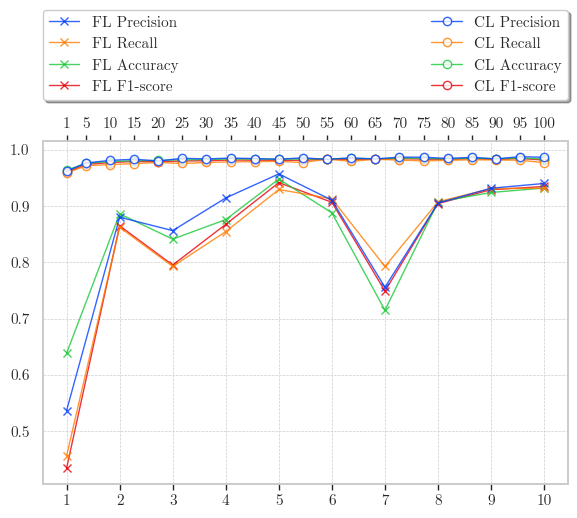

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

def plot_validation_accuracies(fl_rounds, rounds, fl_metrics, cl_metrics, filename):
    # Set figure size
    plt.figure(figsize=(6, 5.5))

    # Initialize list for lines and labels
    lines = []
    labels = []

    # Define color palette
    # color_palette = sns.color_palette("bright")
    
    # Create main axes for FL metrics with bottom x-axis for FL Rounds
    ax_fl = plt.gca()  # Get current axes for FL metrics
    ax_fl.set_xticks(fl_rounds)  # Set FL Rounds on the bottom x-axis
    ax_fl.set_xticklabels([f'{i//10}' for i in fl_rounds])  # Label as Round 1, Round 2, ..., based on FL rounds
    # ax_fl.set_xlabel('FL Rounds')
    ax_fl.xaxis.tick_bottom()
    ax_fl.tick_params(axis='x', which='major', width=1, length=4)  # Set tick length for bottom x-axis

    # Plot FL metrics
    for i, (metric, values) in enumerate(fl_metrics.items()):
        line, = ax_fl.plot(fl_rounds, values, marker='x', color=color_palette[i], markerfacecolor='white',
                        zorder=len(fl_metrics)-i, alpha=0.8, linewidth=1)
        lines.append(line)
        labels.append(f'FL {metric.split()[1]}') if 'FL' in metric else labels.append(metric.replace("_", "\_"))

    # Create secondary axes for CL metrics with top x-axis for CL Epochs
    ax_cl = ax_fl.twiny()  # Create a new x-axis at the top
    ax_cl.set_xticks(rounds)  # Set CL Epochs on the top x-axis
    # ax_cl.set_xlabel('CL Epochs')
    ax_cl.xaxis.tick_top()
    ax_cl.tick_params(axis='x', which='major', width=1, length=4)  # Set tick length for bottom x-axis

    # Plot CL metrics
    for i, (metric, values) in enumerate(cl_metrics.items()):
        line, = ax_cl.plot(rounds, values, marker='o', color=color_palette[i], markerfacecolor='white',
                        zorder=len(cl_metrics)-i, alpha=0.8, linewidth=1)
        lines.append(line)
        labels.append(f'CL {metric.split()[1]}') if 'CL' in metric else labels.append(metric.replace("_", "\_"))

    # Add other plot elements
    plt.ylabel('Metrics')
    ax_cl.grid(False)  # Turn off the grid for the top x-axis
    plt.legend(lines, labels, bbox_to_anchor=(0., 1.12, 1., .102), loc='lower left', ncol=2, mode="expand",
               borderaxespad=0., fancybox=True, shadow=True)
    ax_fl.grid(linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()


# Set the font and color palette
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.size'] = '14'
color_palette = sns.color_palette("bright")

# Read the JSON file
with open('results/cl_results.json', 'r') as f:
    cl_data = json.load(f)
    
with open(f'results/{SCENARIO}_fl_server_results.json', 'r') as f:
    s_data = json.load(f)
    
fl_metrics = {
"FL Precision": s_data['val_metrics']['precision'],
"FL Recall": s_data['val_metrics']['recall'],  
"FL Accuracy": s_data['val_metrics']['accuracy'],   
"FL F1-score": s_data['val_metrics']['f1_score']  
}

cl_metrics = {
"CL Precision": cl_data['val_metrics']['precision'],
"CL Recall": cl_data['val_metrics']['recall'],
"CL Accuracy": cl_data['val_metrics']['accuracy'],
"CL F1-score": cl_data['val_metrics']['f1_score'],   
}

# Training rounds
n = 5

# Create a list of all rounds
all_rounds = np.arange(1, 101)

fl_rounds = np.arange(10, 101, 10)  # [10, 20, 30, ..., 100]

# Select specific rounds: 1, n, 2n, 3n, ..., 100
rounds = np.append(all_rounds[0], all_rounds[n-1::n])

# Update values to match new rounds
# fl_metrics = {key: np.append(values[0], values[n-1::n]) for key, values in fl_metrics.items()}
cl_metrics = {key: np.append(values[0], values[n-1::n]) for key, values in cl_metrics.items()}

plot_validation_accuracies(fl_rounds, rounds, fl_metrics, cl_metrics, f'results/fig/fl_{SCENARIO}_mpm_all.png')

## Plot the validaiton accuracy along with the macro-averaged precision, recall, and f1-score

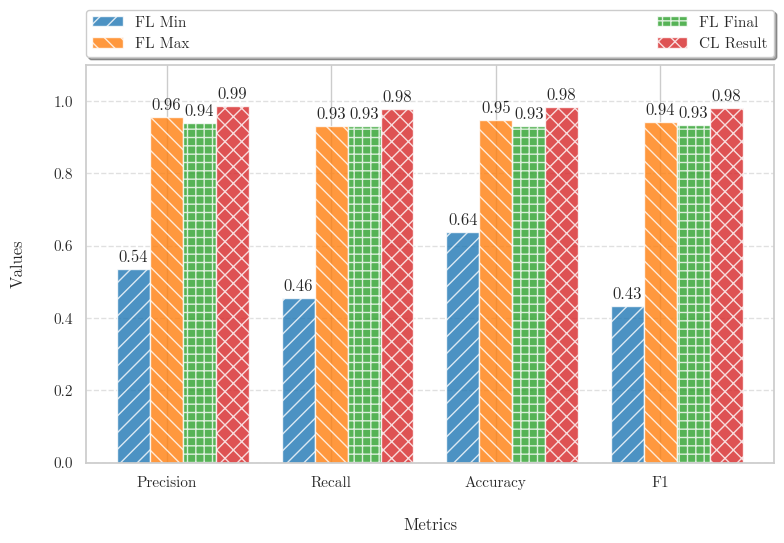

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the font family and size
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.size'] = 12

# Set the Seaborn color palette
sns.set_palette('tab10')

# Read the JSON file
with open('results/cl_results.json', 'r') as f:
    cl_data = json.load(f)
    
with open(f'results/{SCENARIO}_fl_server_results.json', 'r') as f:
    s_data = json.load(f)

# IID FL results
fl_precision_iid = np.array(s_data['val_metrics']['precision'])
fl_recall_iid = np.array(s_data['val_metrics']['recall'])
fl_accuracy_iid = np.array(s_data['val_metrics']['accuracy'])
fl_f1_iid = np.array(s_data['val_metrics']['f1_score'])

# CL results
cl_results = np.array([cl_data['val_metrics']['precision'][-1], cl_data['val_metrics']['recall'][-1], cl_data['val_metrics']['accuracy'][-1], cl_data['val_metrics']['f1_score'][-1]])

metrics = ["Precision", "Recall", "Accuracy", "F1"]

def plot_graph(fl_precision, fl_recall, fl_accuracy, fl_f1, plot_name):
    fl_min = [fl_precision.min(), fl_recall.min(), fl_accuracy.min(), fl_f1.min()]
    fl_max = [fl_precision.max(), fl_recall.max(), fl_accuracy.max(), fl_f1.max()]
    fl_final = [fl_precision[-1], fl_recall[-1], fl_accuracy[-1], fl_f1[-1]]

    x = np.arange(len(metrics))

    fig, ax = plt.subplots(figsize=(8, 5.6))

    bar_width = 0.20
    opacity = 0.8
    hatch_patterns = ['//', '\\\\', '++', 'xx']

    rects1 = ax.bar(x - bar_width, fl_min, bar_width, alpha=opacity, label='FL Min', hatch=hatch_patterns[0])
    rects2 = ax.bar(x, fl_max, bar_width, alpha=opacity, label='FL Max', hatch=hatch_patterns[1])
    rects3 = ax.bar(x + bar_width, fl_final, bar_width, alpha=opacity, label='FL Final', hatch=hatch_patterns[2])
    rects4 = ax.bar(x + 2*bar_width, cl_results, bar_width, alpha=opacity, label='CL Result', hatch=hatch_patterns[3])

    # Adding labels
    ax.set_xlabel('Metrics', labelpad=20)
    ax.set_ylabel('Values', labelpad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylim(0, 1.1)  # Increase y-axis limit

    # Set the legend
    ax.legend(loc='lower left', bbox_to_anchor=(0., 1.02, 1., .102), fancybox=True, shadow=True, ncol=2, mode="expand", borderaxespad=0.)

    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Function to attach a label above each bar in rects
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # Offset label by 3 points above bar
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

    fig.tight_layout()
    plt.savefig(plot_name, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

plot_graph(fl_precision_iid, fl_recall_iid, fl_accuracy_iid, fl_f1_iid, f'results/fig/fl_{SCENARIO}_mpm.png')

## Plot the normalized confusion matrix

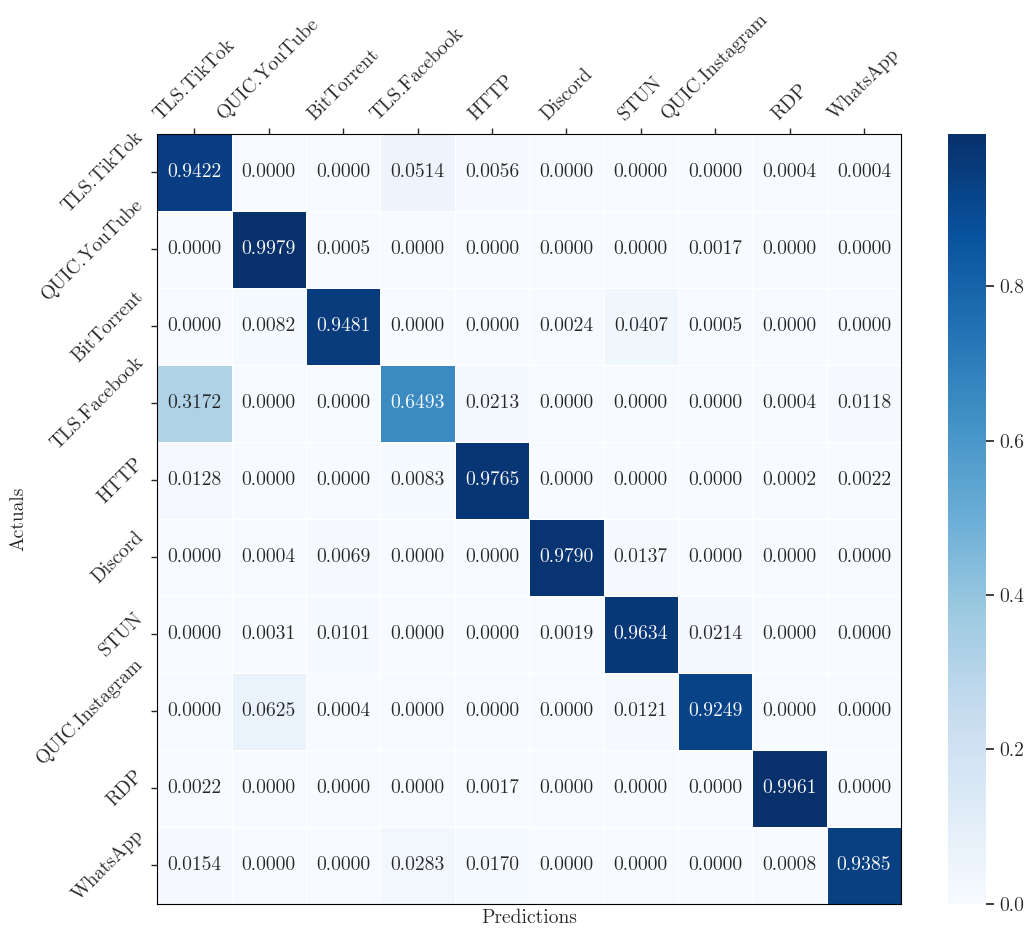

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels for our axes
labels =  ["TLS.TikTok", "QUIC.YouTube", "BitTorrent", "TLS.Facebook", "HTTP", 
           "Discord", "STUN", "QUIC.Instagram", "RDP", "WhatsApp"]

# Read the JSON file
with open(f'results/{SCENARIO}_fl_server_results.json', 'r') as f:
    data = json.load(f)

# Define the confusion matrix
fl_iid_confusion = data['val_metrics']['confusion_matrix'][-1]


FSIZE = 14

# Set the font family and size
plt.rcParams['font.family'] = 'CMU Serif'
plt.rcParams['font.size'] = FSIZE

cmap = sns.color_palette("Blues", as_cmap=True)

# Function to plot a confusion matrix
def plot_confusion_matrix(confusion_matrix, plot_name):
    fig, ax = plt.subplots(figsize=(12, 10))

    heatmap = sns.heatmap(confusion_matrix
                          , annot=True
                          , fmt=".4f"
                          , linewidths=.5
                          , ax=ax
                          , cmap=cmap
                          , cbar=True
                          , rasterized=False
                          )
    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=FSIZE)

    for spine in ax.spines.values():
        spine.set(visible=True, lw=.8, edgecolor="black")

    # Set up axes
    ax.set_xticklabels(labels, rotation=45, ha='center', fontsize=FSIZE)  # Rotate the x-axis tick labels by 45 degrees
    ax.set_yticklabels(labels, rotation=45, ha='right', fontsize=FSIZE)  # Rotate the y-axis tick labels by 45 degrees
    ax.set_xlabel('Predictions', fontsize=FSIZE)
    ax.set_ylabel('Actuals', fontsize=FSIZE)

    # Move the x-axis tick labels to the top
    ax.xaxis.set_tick_params(labeltop=True, labelbottom=False)
    # ax.xaxis.set_tick_params(labeltop=False, labelbottom=False)

    # Move the x-axis ticks to the top
    ax.tick_params(axis='x', which='both', top=True, bottom=False, width=1, length=4)
    ax.tick_params(axis='y', which='both', left=True, width=1, length=4)
    # ax.yaxis.set_tick_params(length=0)
    
    # Show the plot
    plt.savefig(plot_name, dpi=300, bbox_inches='tight')
    plt.show()

plot_confusion_matrix(fl_iid_confusion, f"results/fig/fl_{SCENARIO}_cm.png")